In [2]:
import pandas as pd
df = pd.read_csv("IRIS.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
#prepare Fearures and Labels
X = df.drop(columns='species', axis=1)
y = df['species']

In [7]:
# split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
#Normalize the features
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [9]:
# Train KNN Model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [10]:
# Predicat and Evaluate
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report
print("Model Accuracy: ", model.score(X_test, y_test))
print(classification_report(y_test, model.predict(X_test)))

Model Accuracy:  1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [11]:
# Instead of only KNN compare several models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "SVM": SVC(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Accuracy: {model.score(X_test, y_test):.2f}")

Logistic Regression Accuracy: 1.00
K-Nearest Neighbors Accuracy: 1.00
SVM Accuracy: 1.00
Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00


In [13]:
# Hyperparameter Tuning (Grid Search CV)
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_neighbors': range(1, 20),
    'weights': ['uniform', 'distance'],
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best parameters found: ", grid.best_params_)

Best parameters found:  {'n_neighbors': 9, 'weights': 'distance'}


<Axes: >

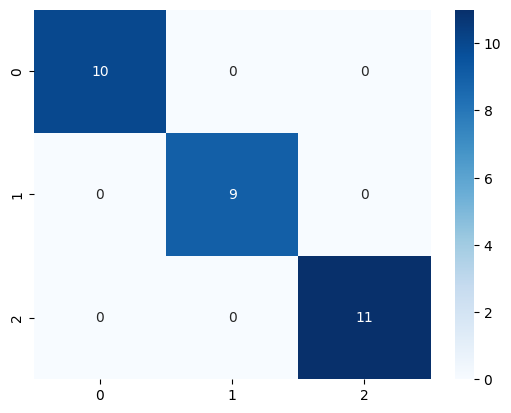

In [14]:
# CONFUSION MATRIX visualization
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues' )

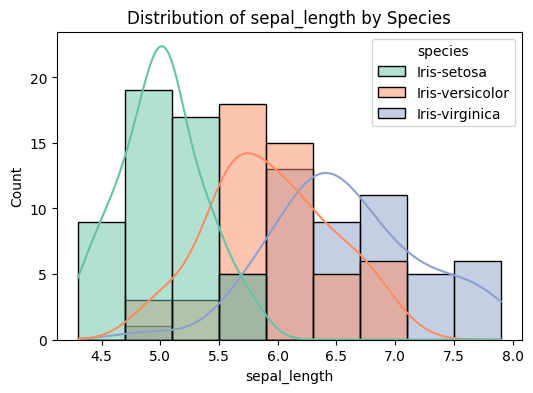

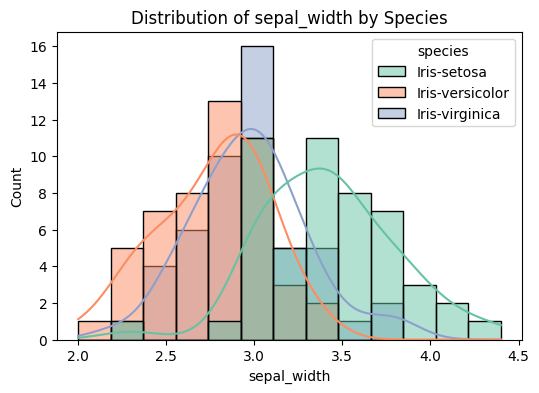

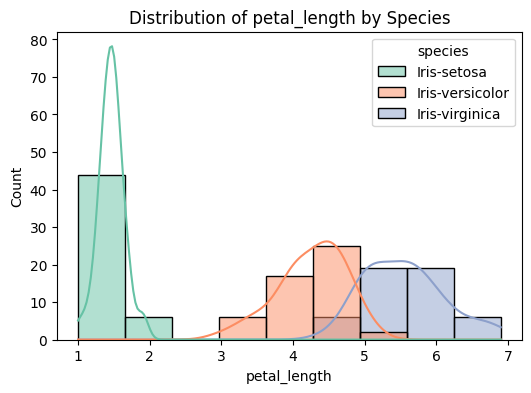

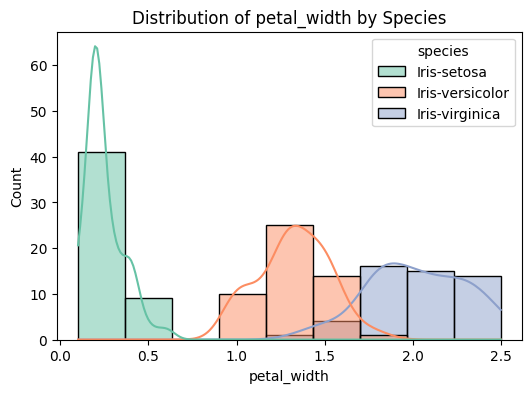

In [17]:
# Histogram of the features
import matplotlib.pyplot as plt
feature_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

for feature in feature_names:
	plt.figure(figsize=(6, 4))
	sns.histplot(data=df, x=feature, hue='species', kde=True, palette='Set2')
	plt.title(f'Distribution of {feature} by Species')
	plt.xlabel(feature)
	plt.ylabel('Count')
	plt.show()

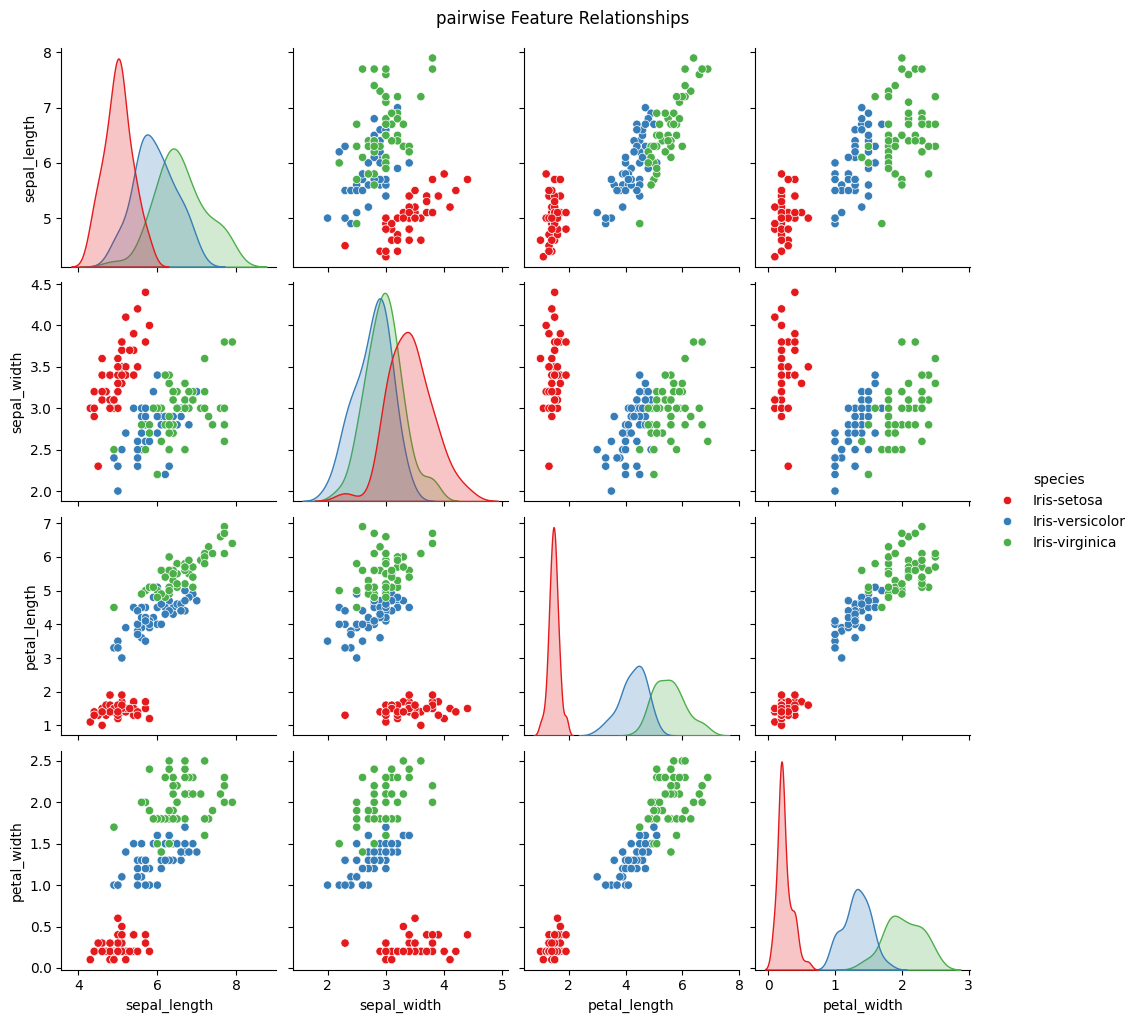

In [18]:
# pairplot of the features
sns.pairplot(df, hue='species', palette='Set1')
plt.suptitle('pairwise Feature Relationships', y=1.02)
plt.show()

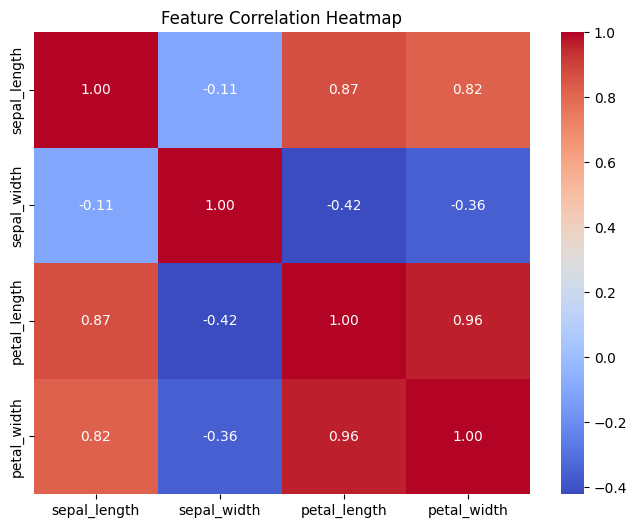

In [20]:
# Heatmap (Feature Correlation)
plt.figure(figsize=(8, 6))
numeric_df = df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_25660\2488784980.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="species", y="petal_length", palette='Accent')


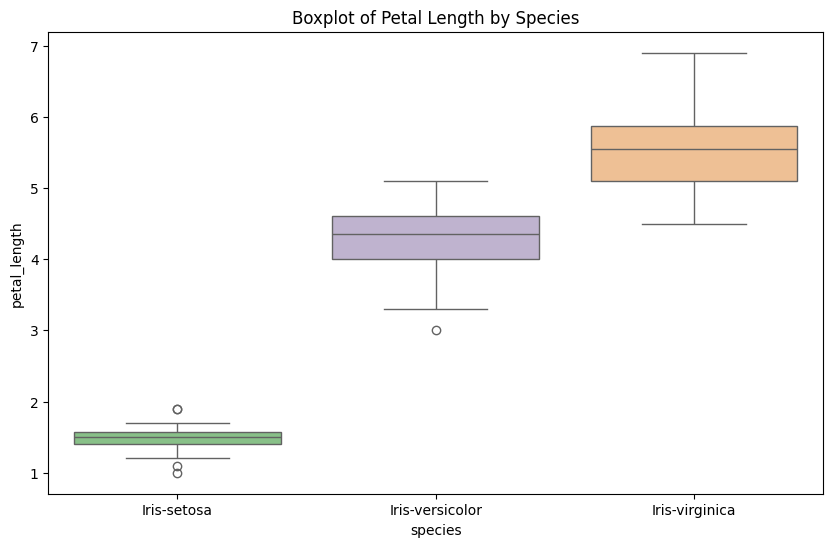

In [22]:
# Boxplot (Outliers & Distribution)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="species", y="petal_length", palette='Accent')
plt.title('Boxplot of Petal Length by Species')
plt.show()

C:\Users\harsh\AppData\Local\Temp\ipykernel_25660\1672659995.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="species", y="sepal_width", palette="Pastel2")


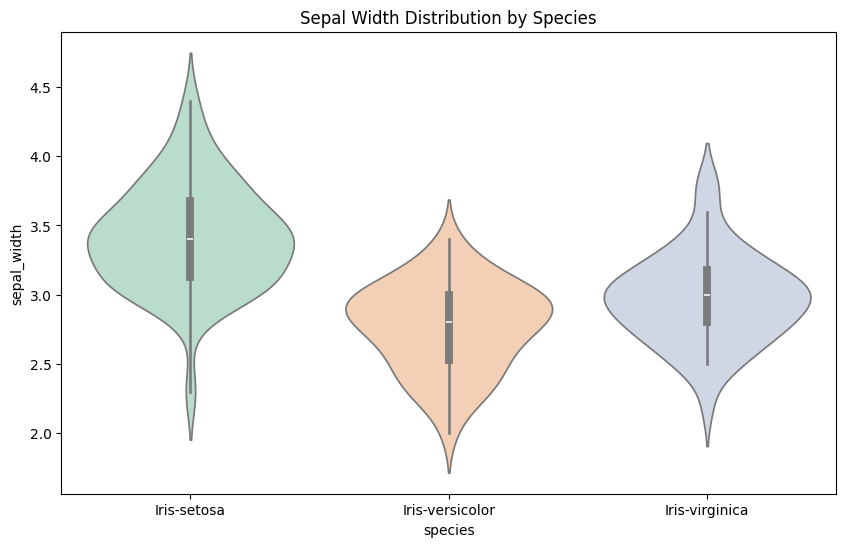

In [24]:
# Violin Plot ( Shape + Distribution)
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="species", y="sepal_width", palette="Pastel2")
plt.title('Sepal Width Distribution by Species')
plt.show()